In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
file_path = 'Loan_default.csv'
df = pd.read_csv(file_path)
print(df.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [3]:
education_mapping = {
    'High School': 0,
    "Bachelor's": 1,
    "Master's" : 2,
    "PhD" : 3
}

df['education_label'] = df['Education'].map(education_mapping).fillna(0)

employment_mapping = {
    'Unemployed': 0,
    "Self-employed": 1,
    "Part-time" : 2,
    "Full-time" : 3
}

df['employment_label'] = df['EmploymentType'].map(employment_mapping).fillna(0)

marital_mapping = {
    'Divorced': 0,
    "Single": 1,
    "Married" : 2
}

df['marital_label'] = df['MaritalStatus'].map(marital_mapping).fillna(0)

mortgage_mapping = {
    'No': 0,
    "Yes": 1
}

df['mortgage_label'] = df['HasMortgage'].map(mortgage_mapping).fillna(0)

dependent_mapping = {
    'No': 0,
    "Yes": 1
}

df['dependent_label'] = df['HasDependents'].map(dependent_mapping).fillna(0)

purpose_mapping = {
    'Other': 0,
    "Business": 1,
    "Education" : 2,
    "Auto" : 3,
    "Home" : 4
}

df['purpose_label'] = df['LoanPurpose'].map(purpose_mapping).fillna(0)

CoSigner_mapping = {
    'No': 0,
    "Yes": 1
}

df['CoSigner_label'] = df['HasCoSigner'].map(CoSigner_mapping).fillna(0)

In [4]:
features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 
            'InterestRate', 'LoanTerm', 'DTIRatio', 'education_label', 'employment_label', 
            'marital_label', 'mortgage_label', 'dependent_label', 'purpose_label', 'CoSigner_label']

X = df[features]
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Model Accuracy: 0.8856
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.60      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.74      0.51      0.50     51070
weighted avg       0.85      0.89      0.84     51070



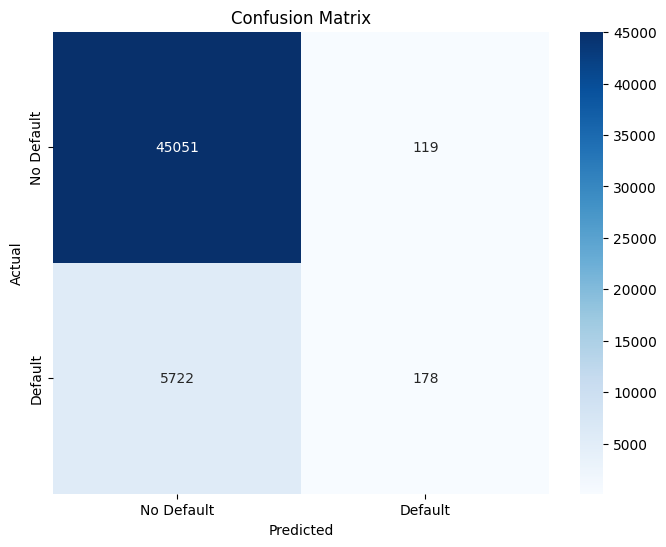

In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Model Accuracy: 0.8867
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.63      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070



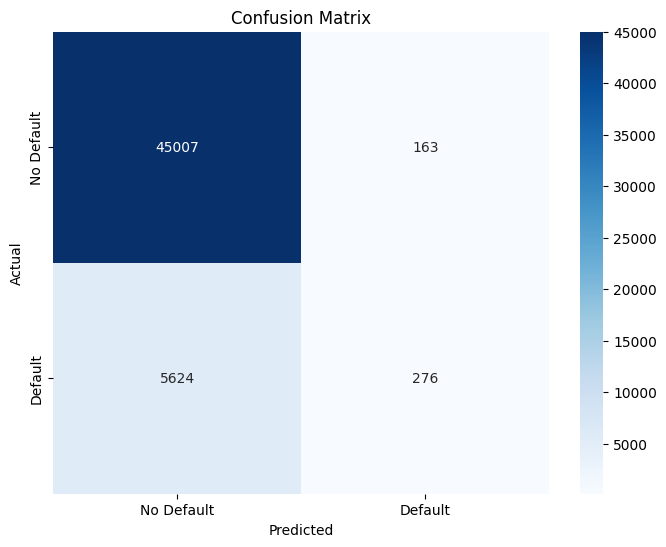

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Naive Bayes

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = GaussianNB()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Model Accuracy: 0.8856
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.70      0.02      0.03      5900

    accuracy                           0.89     51070
   macro avg       0.79      0.51      0.49     51070
weighted avg       0.87      0.89      0.83     51070



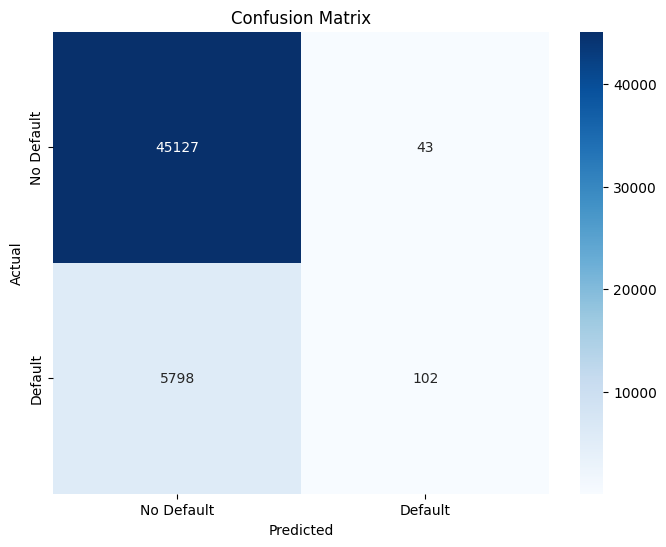

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM(Support Vector Machine)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Model Accuracy: 0.8845
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.00      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

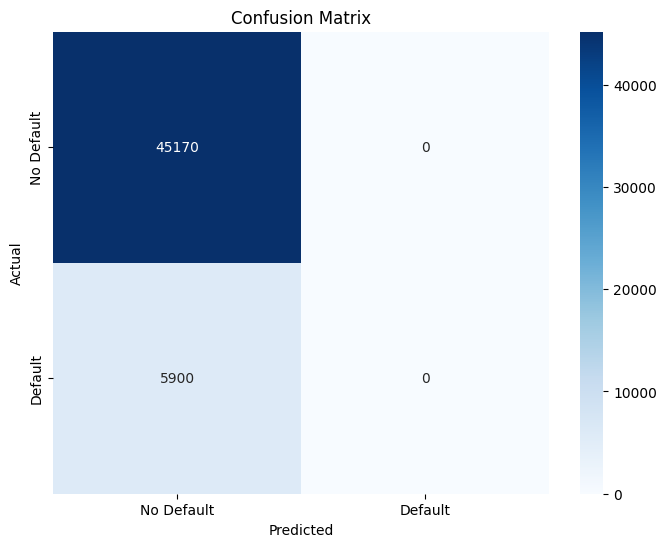

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()